# Data Cleaning / Exploratory Analysis - Template

## Loading Data

In [27]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# pd.read_excel()
# pd.read_json()
# pd.read_html()
# pd.read_sql()
# pd.read_pickle()

## Dataset Description

In [77]:
df.tail()
df.head()
df.describe()
df.shape
df.nunique()
df.duplicated().sum()
df.isnull().sum()
(df.isnull().sum()*100)/len(df) # null %
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Columns Description

In [78]:
df['Survived'].unique()
df['Survived'].value_counts()
df['Age'].mean()
df['Age'].median()
df['Age'].quantile()
df['Age'].std()
df['Age'].var()
df['Pclass'].mode();

## Selecting/Filtering Data

In [ ]:
df['Survived']
df[['Survived', 'Sex']]
df.df.loc[:2] # Set of rows
df.iloc[:2, :2] # Set of rows, Set of columns
df[df['Survived'] == 0] # Filter by column condition
df.loc[(df['Survived'] == 0) & (df['Sex'] == 'male')] # Filter by 2 conditions
df.loc[(df['Survived'] == 0) | (df['Sex'] == 'male')] # Or condition
df.groupby('Survived').sum()

## Manipulating Data

In [73]:
df.rename({'Sex': 'Gender'}, axis=1) #inplace=True to rename column
pd.to_numeric(df.Parch, downcast='integer') # Convert to int
df.Sex.astype(str) # Convert dtype
df.drop_duplicates() # Inplace=True for dropping duplicates
df.drop(columns=['Cabin', 'Fare']) # Drop columns (Inplace=True)
df.drop(df[df['Survived'] == 0].index); # Drop rows based on a given condition

## Merging/Concatenating Datasets

- merge(): for combining data on common columns or indices
- join(): for combining data on a key column or an index
- concat(): for combining DataFrames across rows or columns

In [ ]:
# Inner join will discard only those rows that do not match
inner_merged = pd.merge(df1, df2)

# No rows are lost in an outer join
outer_merged = pd.merge(df1, df2, how="outer", on=['column'])

**left outer join** — with the how parameter. Using a left outer join will leave your new merged DataFrame with all rows from the left DataFrame, while discarding rows from the right DataFrame that don’t have a match in the key column of the left DataFrame.

The **right join** (or right outer join) is the mirror-image version of the left join.

In [ ]:
# Using concat
pd.concat([df1, df2], axis=1)

## Missing Data

In [79]:
### Check if there is any missing value in the dataset ###
def check_missing(df, col):
    missing  = 0
    misVariables = []
    CheckNull = df.isnull().sum()
    for var in range(0, len(CheckNull)):
        misVariables.append([col[var], CheckNull[var], round(CheckNull[var]/len(df),3)])
        missing = missing + 1

    if missing == 0:
        print('Dataset is complete with no blanks.')
    else:
        df_misVariables = pd.DataFrame.from_records(misVariables)
        df_misVariables.columns = ['Variable', 'Missing', 'Percentage']
        s = df_misVariables.sort_values(by=['Percentage'], ascending=False).style.bar(subset=['Percentage'], color='#d65f5f')
        display(s)
        
    return df_misVariables
        
ranked_df_missing_value = check_missing(df, df.columns)

,Variable,Missing,Percentage
10,Cabin,687,0.771000
5,Age,177,0.199000
11,Embarked,2,0.002000
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
6,SibSp,0,0.000000
7,Parch,0,0.000000


#### Handling missing data

In [82]:
'''Dropping all rows with missing values'''
df.dropna() # inplace=True

'''Dropping all rows with at least 2 missing values'''
df.dropna(thresh=2) # inplace=True

'''Dropping all columns with missing values'''
df.dropna(axis=1) # inplace=True

'''Imputing data'''
df['Age'].fillna(value=df['Age'].mean()) # Median / Mode

'''Using k-nearest neighbors model'''
# from sklearn.impute import KNNImputer
# df_knn = df.copy(deep=True)

# knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
# df_knn['Age'] = knn_imputer.fit_transform(df_knn[['Age']])

'''Using MICE approach'''
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# df_mice = df.copy(deep=True)

# mice_imputer = IterativeImputer()
# df_mice['Age'] = mice_imputer.fit_transform(df_mice[['Age']])

'''Imputing data according to gender'''
# height_weight = ['height', 'weight']

# for i, v in enumerate(height_weight):
#     df[v] = df.groupby('gender')[v].transform(lambda grp: grp.fillna(grp.median()))

'Using MICE approach'

## Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

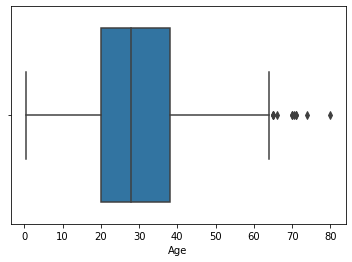

In [83]:
# Visualizing outliers with boxplot
sns.boxplot(df['Age'])

In [85]:
# Calculating Q1(25 percentile) & Q3(75 percentile) 
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculating "IQR"
IQR = Q3 - Q1

# Calculating lower and upper whiskers
Upper_Limit = Q3 + 1.5*IQR
Lower_Limit = Q1 - 1.5*IQR

print("Upper Limit: {}".format(Upper_Limit))
print("Lower Limit: {}".format(Lower_Limit))

Upper Limit: 64.8125
Lower Limit: -6.6875


In [86]:
outliers_iqr = df['Age'][(df['Age'] > Upper_Limit) | (df['Age'] < Lower_Limit)]
print("Outliers:\n{}".format(outliers_iqr))
print("\nNumber of Outliers: {}".format(outliers_iqr.shape[0]))

Outliers:
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

Number of Outliers: 11


In [97]:
from sklearn.covariance import EllipticEnvelope

clf_ee = EllipticEnvelope(contamination=0.1) # 10% of the data
legend = {}
df2 = df.dropna()
df2 = df2[['Age', 'Pclass', 'Parch']]

# Compare features under given settings
xx, yy = np.meshgrid(np.linspace(-35, 35, 500), np.linspace(-35, 35, 500))
plt.figure(1, figsize=(10,10))
clf_ee.fit(df2.values)

# Predicting outliers
outliers_clf = clf_ee.predict(df2[['Age', 'Pclass', 'Parch']])

<Figure size 720x720 with 0 Axes>

In [98]:
pd.Series(outliers_clf).value_counts()

 1    164
-1     19
dtype: int64

## Categorical Features

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


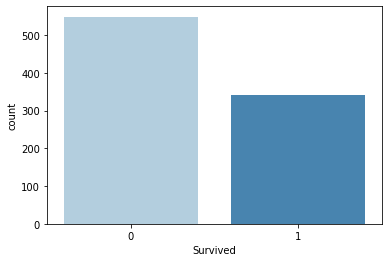

In [9]:
sns.countplot(df.Survived, palette='Blues');

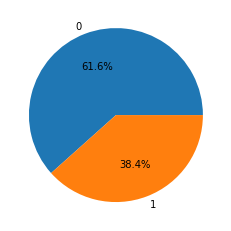

In [13]:
survived_count = df.Survived.value_counts()
plt.pie(survived_count, labels=[0,1], autopct='%1.1f%%');

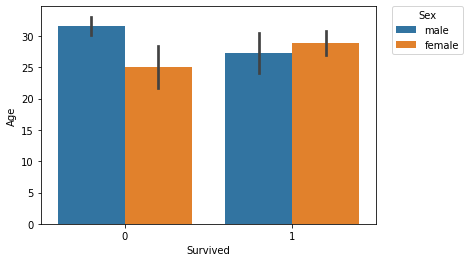

In [7]:
sns.barplot(data=df, x='Survived', y='Age', hue='Sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Sex')
plt.show();

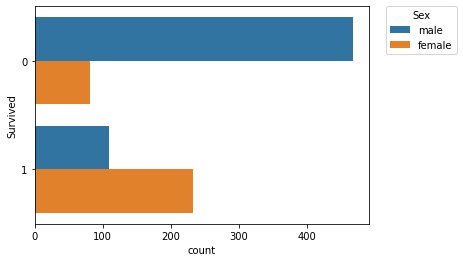

In [6]:
g = sns.countplot(y='Survived', hue='Sex', data=df)
#plt.title()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Sex')
plt.show();

**Association between categorical features**

*Cramér's V* varies from 0 (corresponding to no association between the variables) to 1 (complete association) and can reach 1 only when each variable is completely determined by the other.

Source: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

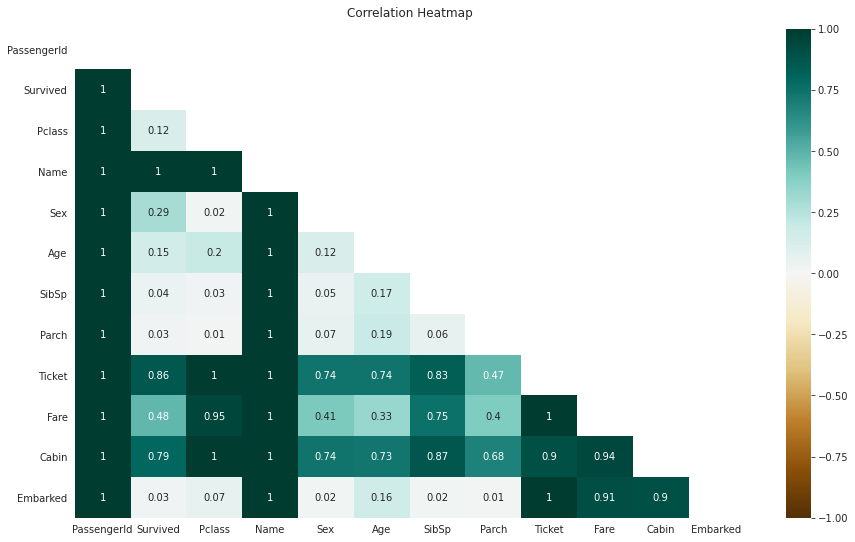

In [41]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :

    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table

    return (stat/(obs*mini))

rows= []

for var1 in df:

    col = []
    for var2 in df:
        cramers =cramers_V(df[var1], df[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
cramerv_matrix = pd.DataFrame(cramers_results, columns = df.columns, index =df.columns)
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool))
plt.figure(figsize=(15,9))
cat_heatmap = sns.heatmap(cramerv_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Continuous Variables

<AxesSubplot:xlabel='Age'>

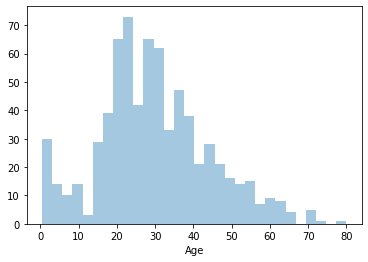

In [17]:
sns.distplot(df.Age, bins=30, kde=False)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

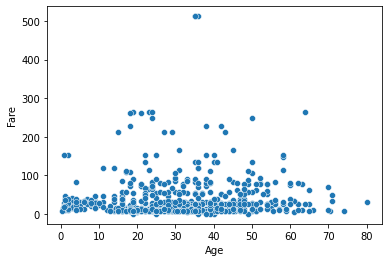

In [25]:
# Visualize the association between 2 continuous variables
sns.scatterplot(data=df, x='Age', y='Fare')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

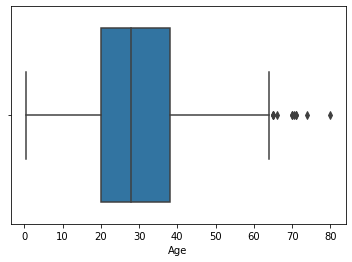

In [18]:
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

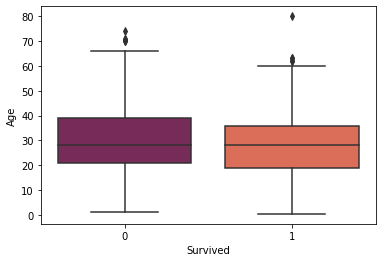

In [19]:
sns.boxplot(y="Age", x="Survived", data=df, palette='rocket')

**Correlation Matrix**

<AxesSubplot:>

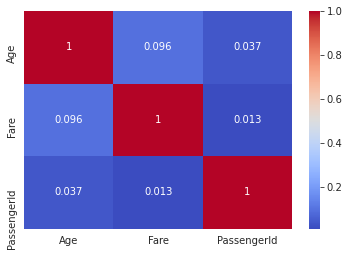

In [36]:
sns.heatmap(df[['Age', 'Fare', 'PassengerId']].corr(), cmap='coolwarm', annot=True)

## Feature Engineering

#### Encoding categorical features with One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encoding features

def one_hot_encode(df):
    
    encoder = OneHotEncoder(drop='first').fit(df)

    # drop enc features
    enc_cols = pd.DataFrame(encoder.transform(df).toarray(), columns=encoder.get_feature_names())
    df_encoded = df.drop(df.columns, axis=1)
    
    for cols in enc_cols.columns:
        df_encoded[cols] = enc_cols[cols]
    
    return df_encoded

#df_enc = one_hot_encode(df.CategoricalColumns)

#### Dealing with Class Imbalance

In [ ]:
# Split target variable
X = df.drop('Survived', axis=1)
y = df.Survived

# Oversample with SMOTE for imbalanced dataset

from collections import Counter
from imblearn.over_sampling import SMOTE


# summarize class distribution
counter = Counter(y)
print(counter)

smote = SMOTE()

# transform the dataset
X, y = smote.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

#### Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)